In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
growth = read.csv("results_most.csv")

In [4]:
head(growth)
tail(growth)
nrow(growth)

County,Republican,Democrat,Nonpartisan,Libertarian,Year
Adams,10282,5944,2789,3,2008
Antelope,3012,1238,490,1,2008
Arthur,265,66,11,0,2008
Banner,442,62,46,0,2008
Blaine,290,74,25,0,2008
Boone,2475,1203,385,0,2008


,County,Republican,Democrat,Nonpartisan,Libertarian,Year
460,Valley,1919,736,345,8,2016
461,Washington,8261,3203,2814,124,2016
462,Wayne,3308,1108,854,47,2016
463,Webster,1471,569,377,12,2016
464,Wheeler,419,126,57,4,2016
465,York,6724,1800,1509,72,2016


[1] 465

In [5]:
statewidenp <- growth %>%
 select("Nonpartisan", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Nonpartisan))

In [6]:
print(statewidenp)

# A tibble: 5 x 2
   Year  total
  <int>  <int>
1  2008 195459
2  2010 212461
3  2012 456722
4  2014 232628
5  2016 246839


For the second, I want to compare the number of nonpartisans to the other parties. I'll want a stacked bar chart for that.

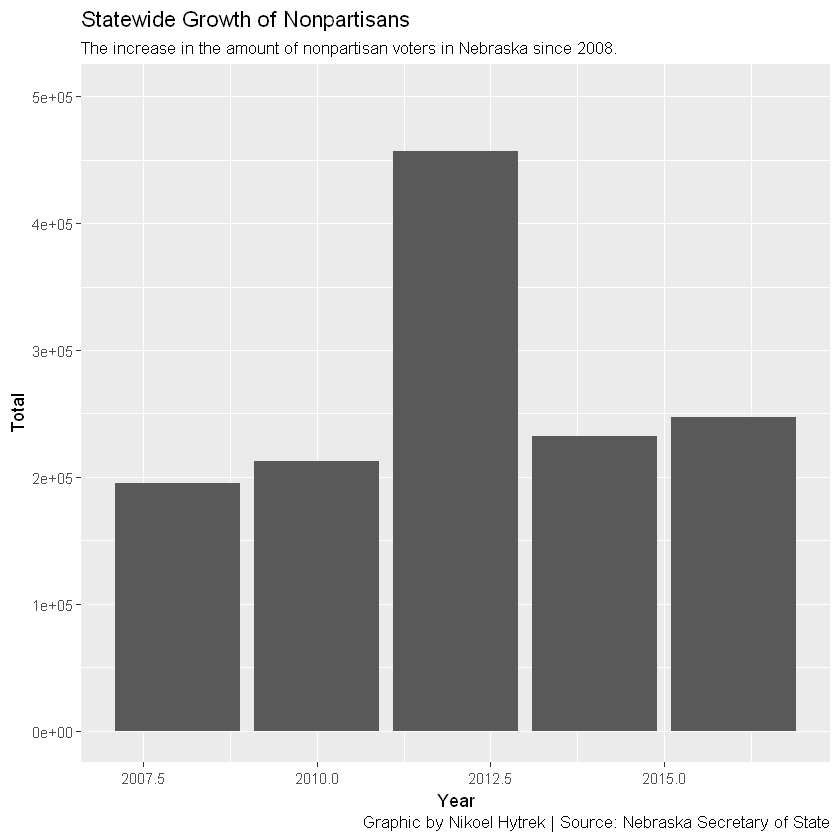

In [7]:
ggplot(statewidenp, aes(x=Year, weight=total)) + geom_bar() + scale_y_continuous(limits = c(0, 500000)) + 
labs(x="Year", y="Total", title="Statewide Growth of Nonpartisans", subtitle="The increase in the amount of nonpartisan voters in Nebraska since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [17]:
ggsave("nonpart.pdf", width=6, height=6)

In [11]:
statewider <- growth %>%
 select("Republican", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Republican))

In [12]:
head(statewider)

Year,total
2008,558308
2010,549011
2012,1116290
2014,549104
2016,583021


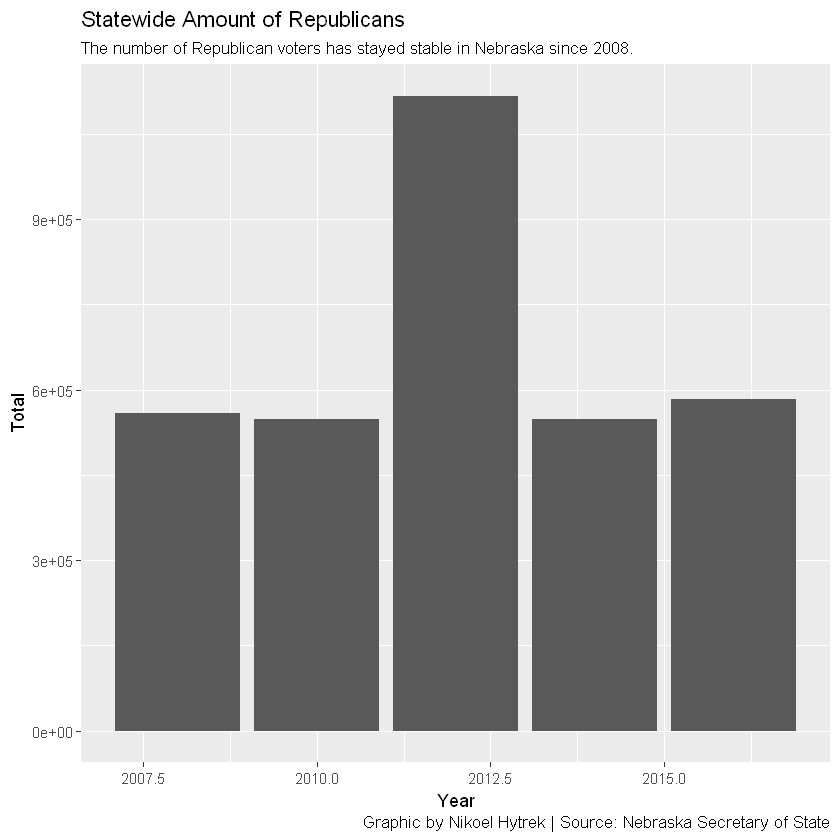

In [13]:
ggplot(statewider, aes(x=Year, weight=total)) + geom_bar() + labs(x="Year", y="Total", title="Statewide Amount of Republicans", subtitle="The number of Republican voters has stayed stable in Nebraska since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [16]:
ggsave("rep.pdf", width=6, height=6)

In [18]:
statewided <- growth %>%
 select("Democrat", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Democrat))

In [19]:
head(statewided)

Year,total
2008,393468
2010,380252
2012,748150
2014,352789
2016,370027


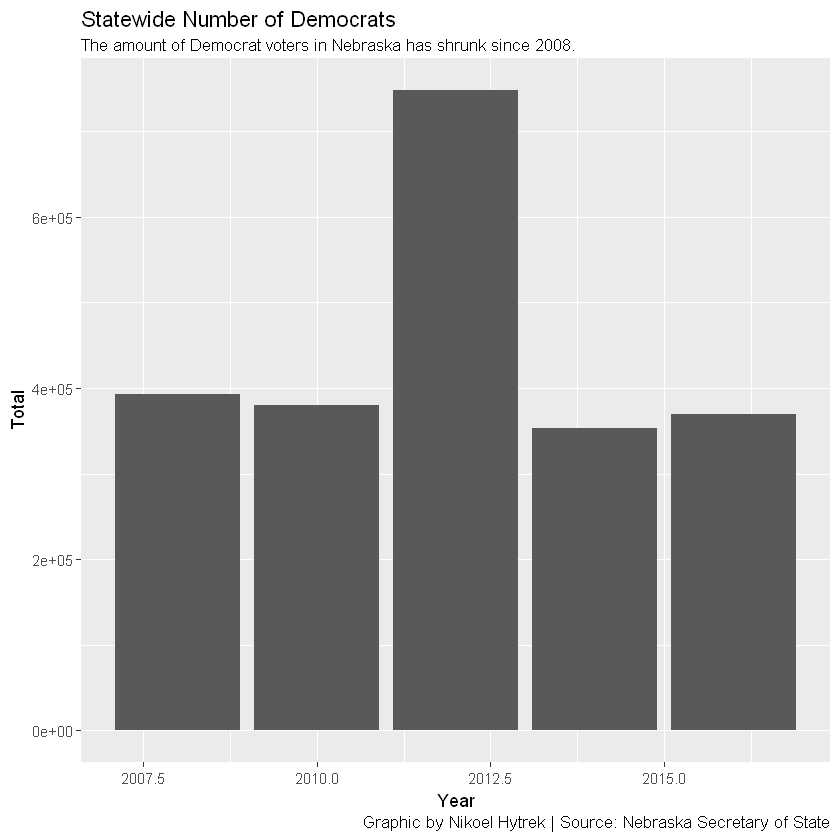

In [20]:
ggplot(statewided, aes(x=Year, weight=total)) + geom_bar() + labs(x="Year", y="Total", title="Statewide Number of Democrats", subtitle="The amount of Democrat voters in Nebraska has shrunk since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [21]:
ggsave("dem.pdf", width=6, height=6)

In [22]:
statewidel <- growth %>%
 select("Libertarian", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Libertarian))

In [23]:
head(statewidel)

Year,total
2008,472
2010,333
2012,6328
2014,5631
2016,11214


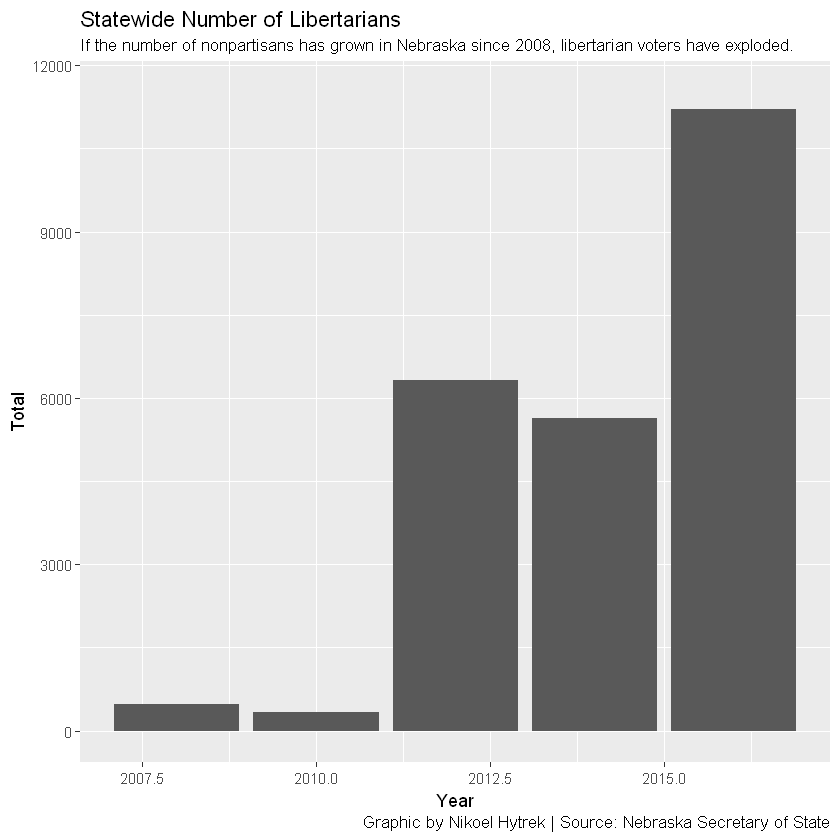

In [24]:
ggplot(statewidel, aes(x=Year, weight=total)) +geom_bar() + scale_y_continuous(limits = c(0, 11500)) + labs(x="Year", y="Total", title="Statewide Number of Libertarians", subtitle="If the number of nonpartisans has grown in Nebraska since 2008, libertarian voters have exploded.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [25]:
ggsave("lib.pdf", width=6, height=6)